In [14]:
import mne
import Sleep_Scripts.PCA as P
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Data
# files = [
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr",
#     "D:/Intracranial_sleep_data/2/iEEG/converted/2_night1_02.vhdr"
# ]
# 
# raw_list = [mne.io.read_raw_brainvision(f, preload=True) for f in files]
# 
# raw = mne.concatenate_raws(raw_list)
raw = mne.io.read_raw_brainvision("D:/Intracranial_sleep_data/7/iEEG/converted/7_night1_02.vhdr", preload=True)

Extracting parameters from D:/Intracranial_sleep_data/7/iEEG/converted/7_night1_02.vhdr...
Setting channel info structure...
Reading 0 ... 2700031  =      0.000 ... 10800.124 secs...


In [16]:
raw_pos = ch_pos = """TBAL1,-24.710330615,1.231500136,-43.8967292852,3.0,0.0,0.0,1.0
TBAL2,-31.540158659,-3.530730988,-44.696755074,3.0,0.0,0.0,1.0
TBAL3,-39.395192058,-7.220481211,-45.4967401417,3.0,0.0,0.0,1.0
TBAL4,-46.176198974,-11.947858446,-46.196745804,3.0,0.0,0.0,1.0
TBAR1,29.8233150888,0.184575719,-43.1512328704,3.0,0.0,0.0,1.0
TBAR2,38.8285585344,-5.642346511,-43.1512328704,3.0,0.0,0.0,1.0
TBAR3,48.3635221827,-10.939548538,-43.1512328704,3.0,0.0,0.0,1.0
TBAR4,56.3093252229,-15.177310159,-43.1512328704,3.0,0.0,0.0,1.0
TBPL1,-23.321609393,-2.961987581,-37.8967504764,3.0,0.0,0.0,1.0
TBPL2,-31.373272156,-8.329762756,-37.8967504764,3.0,0.0,0.0,1.0
TBPL3,-40.498489955,-12.623982896,-37.8967504764,3.0,0.0,0.0,1.0
TBPL4,-48.0133752,-17.991758072,-37.8967504764,3.0,0.0,0.0,1.0
TBPR1,22.3044795975,-5.109097651,-37.8967504764,3.0,0.0,0.0,1.0
TBPR2,31.4296973957,-10.476872826,-37.8967504764,3.0,0.0,0.0,1.0
TBPR3,40.0181376763,-16.918203037,-37.8967504764,3.0,0.0,0.0,1.0
TBPR4,49.1433554745,-22.82275573,-37.8967504764,3.0,0.0,0.0,1.0
TL01,-25.062664026,-6.375814565,-29.9888764281,3.0,0.0,0.0,1.0
TL02,-25.632289616,-10.015602878,-26.9951491745,3.0,0.0,0.0,1.0
TL03,-26.63892536,-13.301689266,-23.680670446,3.0,0.0,0.0,1.0
TL04,-27.604637459,-17.54492081,-20.3931495947,3.0,0.0,0.0,1.0
TL05,-28.415850937,-21.109297964,-17.1291834355,3.0,0.0,0.0,1.0
TL06,-29.075570279,-24.008022138,-13.8826334978,3.0,0.0,0.0,1.0
TL07,-29.731719209,-26.8910583765,-9.6792758342,3.0,0.0,0.0,1.0
TL08,-30.456620466,-30.0761870421,-6.7984938994,3.0,0.0,0.0,1.0
TL09,-31.249008039,-33.5578454163,-3.9399957399,3.0,0.0,0.0,1.0
TL10,-31.822028055,-36.0756202916,-0.7605490856,3.0,0.0,0.0,1.0
TLL01,-51.6884002686,-66.4306907654,9.98564147949,3.0,0.0,0.0,1.0
TLL02,-57.0272579479,-61.5961570676,5.47632993012,3.0,0.0,0.0,1.0
TLL03,-61.5358520347,-52.6961553937,0.00673633539911,3.0,0.0,0.0,1.0
TLL04,-63.0472266446,-45.2961628077,-6.04007082352,3.0,0.0,0.0,1.0
TLL05,-63.1915977698,-36.0961559407,-12.4674245023,3.0,0.0,0.0,1.0
TLL06,-62.2705986616,-26.9961592537,-20.1534686034,3.0,0.0,0.0,1.0
TLR01,46.6540126416,-69.3627798625,34.0776272682,3.0,0.0,0.0,1.0
TLR02,51.3328927974,-63.9627836327,24.8055135274,3.0,0.0,0.0,1.0
TLR03,55.613815434,-59.2627732405,17.2141580709,3.0,0.0,0.0,1.0
TLR04,61.540178143,-52.9231529393,11.0967429305,3.0,0.0,0.0,1.0
TLR05,65.1453682163,-45.8627918409,3.90010606151,3.0,0.0,0.0,1.0
TLR06,67.7637216486,-38.7627901701,-1.08733622783,3.0,0.0,0.0,1.0
TLR07,67.905321357,-32.5627830957,-7.46556258603,3.0,0.0,0.0,1.0
TLR08,67.7809433789,-24.8627739651,-14.4431618393,3.0,0.0,0.0,1.0
TLR09,45.3093665489,-78.1834702889,24.2126160474,3.0,0.0,0.0,1.0
TLR10,48.9848962448,-71.8627786178,16.3365120251,3.0,0.0,0.0,1.0
TLR11,52.116903643,-65.1627716107,10.0152965781,3.0,0.0,0.0,1.0
TLR12,56.1531581678,-59.2627732405,1.16871174179,3.0,0.0,0.0,1.0
TLR13,58.2263433986,-53.3627814702,-6.00433398894,3.0,0.0,0.0,1.0
TLR14,59.1567949044,-43.3627754778,-12.7553265178,3.0,0.0,0.0,1.0
TLR15,61.7459976514,-35.962772772,-17.0640216559,3.0,0.0,0.0,1.0
TLR16,61.096745677,-28.462774015,-21.6306712872,3.0,0.0,0.0,1.0
TR01,26.0433244963,-3.730627577,-29.9090631847,3.0,0.0,0.0,1.0
TR02,26.5333950784,-6.619791668,-26.1364950432,3.0,0.0,0.0,1.0
TR03,27.0644116553,-9.750348944,-22.5661021215,3.0,0.0,0.0,1.0
TR04,27.713729298,-13.578705362,-18.5213975262,3.0,0.0,0.0,1.0
TR05,28.3294795982,-17.209171428,-14.8983746086,3.0,0.0,0.0,1.0
TR06,28.7554829903,-19.720635412,-12.3920601255,3.0,0.0,0.0,1.0
TR07,29.3398228983,-23.165927945,-8.953831055,3.0,0.0,0.0,1.0
TR08,29.8495922648,-26.1712276749,-5.9546933829,3.0,0.0,0.0,1.0
TR09,30.3623781562,-29.1946834134,-2.0229297807,3.0,0.0,0.0,1.0
TR10,30.878337087,-32.2364742955,0.7860765869,3.0,0.0,0.0,1.0
"""

PC1 top channel: TBAR1


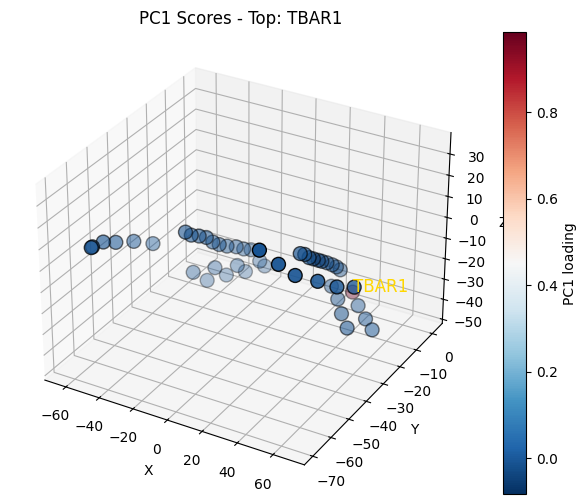

PC2 top channel: TR07


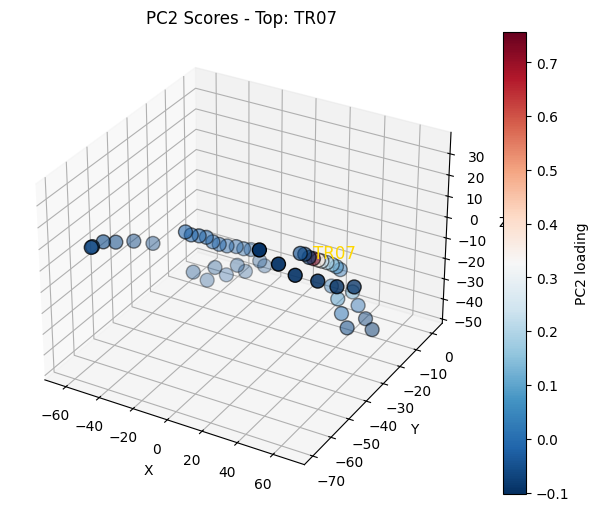

In [17]:
# band options are: beta, gamma, delta, theta, sigma, total and noise
df_features = P.channel_pca_multiband(raw, raw_pos)

In [18]:
print(df_features)

{'pca_loadings': array([[ 0.98538584, -0.02019236, -0.01401156, -0.01205094, -0.02054857,
        -0.02747768, -0.02059636, -0.01454852, -0.00948201, -0.00970659,
        -0.01012133, -0.01006445, -0.00958294, -0.010052  , -0.01841658,
        -0.0161144 , -0.01726075, -0.0166887 , -0.01516479, -0.01608242,
        -0.0140029 , -0.01508084, -0.01181025, -0.01222539, -0.01351294,
        -0.01148116, -0.00903554, -0.00632267, -0.0296664 , -0.03373531,
        -0.03893847, -0.0402334 , -0.04538842, -0.05415684, -0.08310594,
        -0.01780795, -0.01757288, -0.02000496, -0.02205991, -0.02232822,
        -0.02302949, -0.02273594, -0.02246602, -0.02242482, -0.02227451,
        -0.02193659, -0.02185971, -0.02202271],
       [ 0.08726176, -0.01056836, -0.07014316, -0.08286382,  0.01384232,
         0.0677804 ,  0.00425863, -0.05808786, -0.09359332, -0.09489466,
        -0.09559462, -0.09809103, -0.10241116, -0.09428242, -0.0482736 ,
        -0.04934732, -0.03761272, -0.05076438, -0.05565897,

C:\Users\timmi\AppData\Local\Temp\ipykernel_22100\2558503368.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_power[i] = np.trapz(psd[mask], freqs[mask])


Top channel for delta band: TR07


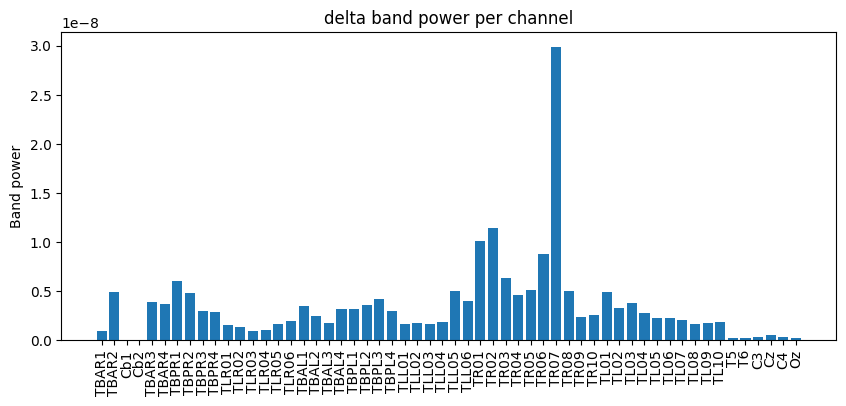

Top channel for theta band: TR07


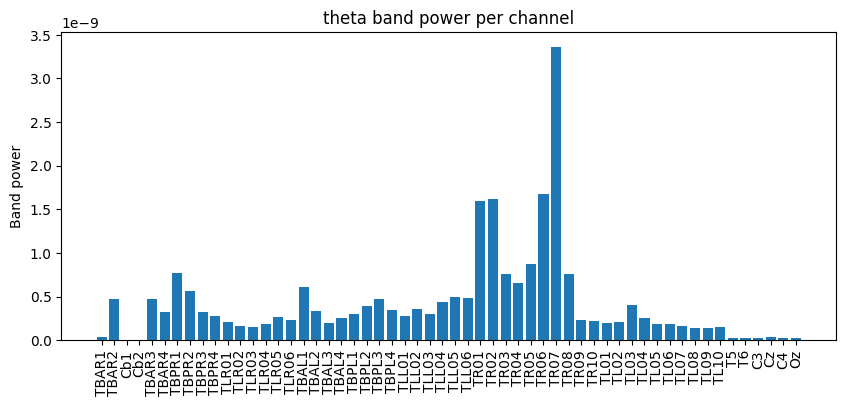

Top channel for sigma band: TR07


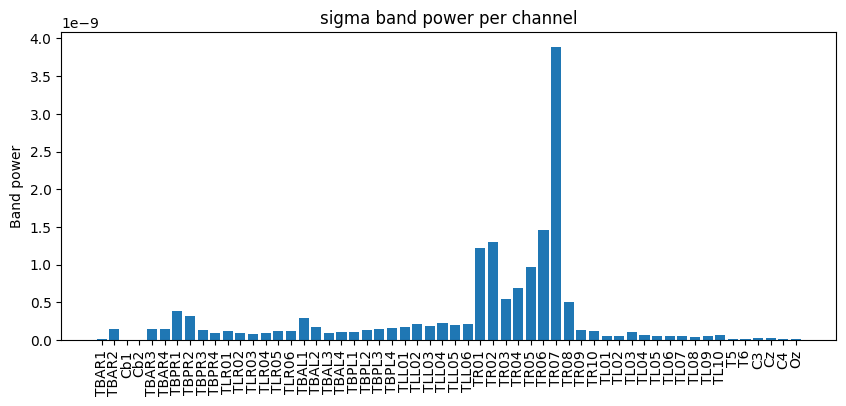

Top channel for beta band: TR02


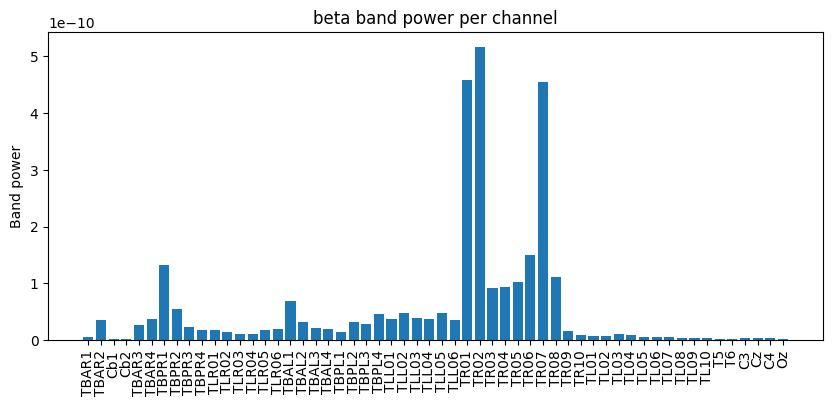

Top channel for gamma band: TR02


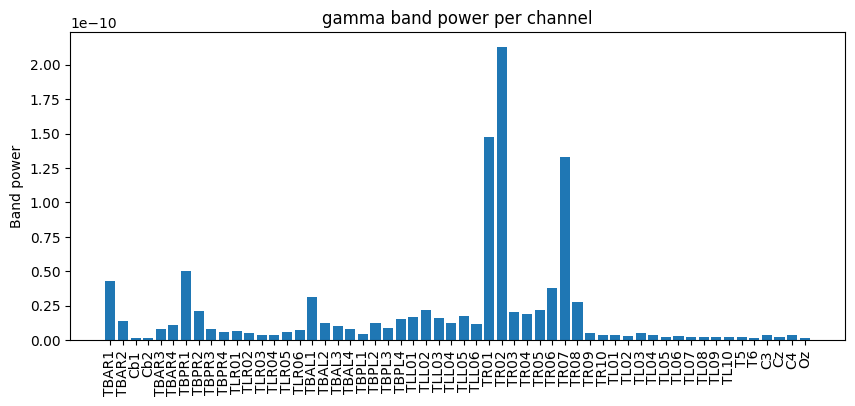

Top channel for total band: TR07


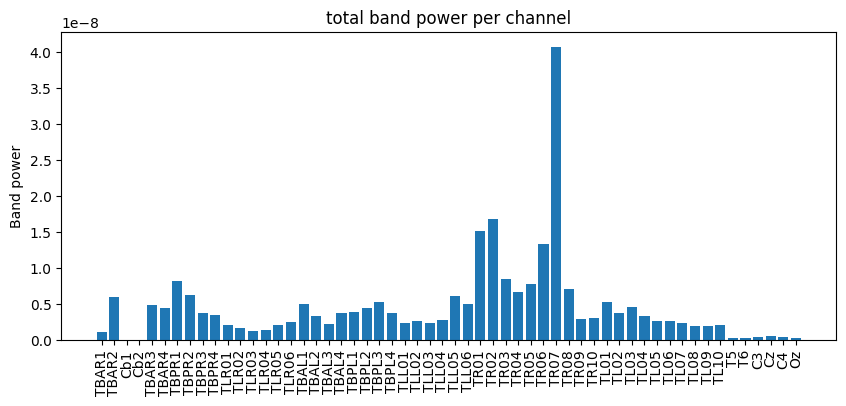

In [19]:
from scipy.signal import welch
bands = {
    "delta": (0.5, 5),
    "theta": (6, 10),
    "sigma": (11, 17),
    "beta":  (22, 30),
    "gamma": (35, 45),
    "total": (0.5, 45)
}

fs = raw.info['sfreq']  # sampling rate

# Channels to exclude
exclude_chs = ['EOG1','EOG2','EMG1','EMG2','EKG1','EKG2']

# Get list of channels to include
include_chs = [ch for ch in raw.ch_names if ch not in exclude_chs]

for band_name, band_range in bands.items():
    band_power = np.zeros(len(include_chs))
    for i, ch in enumerate(include_chs):
        data = raw.get_data(picks=[ch])[0]  # get channel data
        freqs, psd = welch(data, fs=fs, nperseg=int(fs*2))  # 2-second windows
        mask = (freqs >= band_range[0]) & (freqs <= band_range[1])
        band_power[i] = np.trapz(psd[mask], freqs[mask])

    top_idx = np.argmax(band_power)
    top_channel = include_chs[top_idx]
    print(f"Top channel for {band_name} band: {top_channel}")

    # Plot
    plt.figure(figsize=(10,4))
    plt.bar(include_chs, band_power)
    plt.xticks(rotation=90)
    plt.ylabel('Band power')
    plt.title(f'{band_name} band power per channel')
    plt.savefig(f"{band_name}_ch_barplot.svg", format='svg')
    plt.show()